**All imports**

In [1348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import csv
import random

**Functions are defined here to improve readability**

In [1349]:
def remove_outliers(dataframe, key):
    q1 = np.quantile(dataframe[key], 0.25)
 
    # Vinden van de 3rd quartile
    q3 = np.quantile(dataframe[key], 0.75)
    
    # Vinden van de IQR
    iqr = q3-q1
    
    # Vinden van de upper en lower bound
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    return dataframe[(dataframe[key] >= lower_bound) & (dataframe[key] <= upper_bound)]

def boxplot_gross(dataframe, key):
    fig1, ax1 = plt.subplots()
    ax1.boxplot(dataframe[key])
    def euro_formatter(x, _):
        if x >= 1000000:
            return f"${x / 1000000:.0f}M"
    plt.gca().yaxis.set_major_formatter(FuncFormatter(euro_formatter))
    ax1.set_title(f"Boxplot van het {key}")
    ax1.set_xlabel(key)
    ax1.set_ylabel('Omzet')
    plt.show()

def histogram_gross(dataframe, key):
    plt.hist(dataframe[key], bins=100, color='skyblue', edgecolor='black')
    def euro_formatter(x, _):
        if x >= 1000000:
            return f"${x / 1000000:.0f}M"
    plt.gca().xaxis.set_major_formatter(FuncFormatter(euro_formatter))
    plt.title(f"Aantal voorkomens van {key}")
    plt.xlabel('Omzet')
    plt.ylabel('Frequentie')
    plt.show()

def boxplot_likes(dataframe, key):
    fig1, ax1 = plt.subplots()
    ax1.boxplot(dataframe[key])
    ax1.set_title(f"Boxplot van het {key}")
    ax1.set_xlabel(key)
    ax1.set_ylabel('Aantal likes')
    plt.show()

def histogram_likes(dataframe, key):
    plt.hist(dataframe[key], bins=100, color='skyblue', edgecolor='black')
    plt.title(f"Aantal voorkomens van likes {key}")
    plt.xlabel('Likes')
    plt.ylabel('Frequentie')
    plt.show()

def correlation_plot(df, targetVariable, featureVariable):
    fig1, ax1 = plt.subplots()
    ax1.scatter(df[targetVariable], df[featureVariable], s=3)

    ax1.set_xlabel(targetVariable)
    ax1.set_ylabel(featureVariable)

    # r-waarde en p-waarde
    correlation = df[[targetVariable, featureVariable]].corr().iloc[0, 1]

    # toevoegen aan de titel
    ax1.set_title(f"{targetVariable} vs {featureVariable} (r = {correlation:.2f})")

**Load the dataset**

In [1350]:
dfr = pd.read_csv('data/movie-1.csv')

# Show the maximum info the dataframe can give.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Copy of the dataset**

Making a copy of the data to work with so we will not alter the actual dataset given.

In [1351]:
df = dfr.copy()

**Taking a look at the data we're given**

In [1352]:
df.head(5)

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

**Get the column names to see with what kind of variables we're working with**

In [1353]:
for col in df.columns:
    print(f"column: {col}, dtype: {df[col].dtype}")

column: color, dtype: object
column: director_name, dtype: object
column: num_critic_for_reviews, dtype: float64
column: duration, dtype: float64
column: director_facebook_likes, dtype: float64
column: actor_3_facebook_likes, dtype: float64
column: actor_2_name, dtype: object
column: actor_1_facebook_likes, dtype: float64
column: gross, dtype: float64
column: genres, dtype: object
column: actor_1_name, dtype: object
column: movie_title, dtype: object
column: num_voted_users, dtype: int64
column: cast_total_facebook_likes, dtype: int64
column: actor_3_name, dtype: object
column: facenumber_in_poster, dtype: float64
column: plot_keywords, dtype: object
column: movie_imdb_link, dtype: object
column: num_user_for_reviews, dtype: float64
column: language, dtype: object
column: country, dtype: object
column: content_rating, dtype: object
column: budget, dtype: float64
column: title_year, dtype: float64
column: actor_2_facebook_likes, dtype: float64
column: imdb_score, dtype: float64
column: 

**Measurement levels**

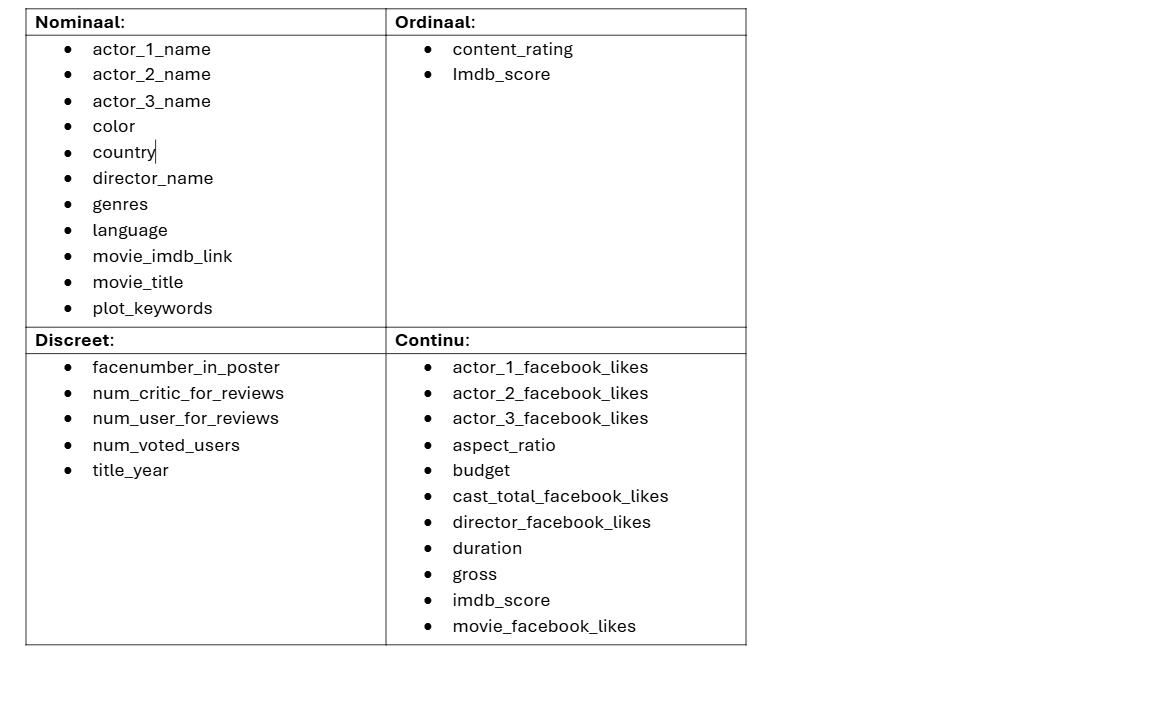

In [1354]:
display(Image(filename="meet.png"))

**Target and Feature variables**

In [1355]:
featureVariables = [ #'movie_title',
                    'director_name', 'director_facebook_likes',
                    'actor_1_name', 'actor_1_facebook_likes', 
                    'actor_2_name', 'actor_2_facebook_likes', 
                    'actor_3_name', 'actor_3_facebook_likes', 
                    'cast_total_facebook_likes',
                    'movie_facebook_likes',
                    'imdb_score']

targetVariable = ['gross']

numVariable =   ['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 
                'movie_facebook_likes', 
                'imdb_score',
                'gross']

**Make another DF with only the columns we're interested in.**

In [1356]:
print(df.shape) #check impact
df = df[featureVariables + targetVariable]
print(df.shape) #check impact

(5043, 28)
(5043, 12)


In [1357]:
df.head(1)

director_name  director_facebook_likes actor_1_name  \
0  James Cameron                      0.0  CCH Pounder   

   actor_1_facebook_likes      actor_2_name  actor_2_facebook_likes  \
0                  1000.0  Joel David Moore                   936.0   

  actor_3_name  actor_3_facebook_likes  cast_total_facebook_likes  \
0    Wes Studi                   855.0                       4834   

   movie_facebook_likes  imdb_score        gross  
0                 33000         7.9  760505847.0

**Check NaN values**

Drop all the NaN values in all the feature and target variables. (for now) Later on we will do more research on how to properly handle these.

In [1358]:
df.isna().sum()

director_name                104
director_facebook_likes      104
actor_1_name                   7
actor_1_facebook_likes         7
actor_2_name                  13
actor_2_facebook_likes        13
actor_3_name                  23
actor_3_facebook_likes        23
cast_total_facebook_likes      0
movie_facebook_likes           0
imdb_score                     0
gross                        884
dtype: int64

In [1359]:
checkNan = df[df['gross'].isna()]
checkNan.head(5)

director_name  director_facebook_likes    actor_1_name  \
4     Doug Walker                    131.0     Doug Walker   
84   Roland Joffé                    596.0  Tamsin Egerton   
98   Hideaki Anno                     28.0   Mark Chinnery   
177           NaN                      NaN     Don Johnson   
199    Matt Birch                      0.0    Rupert Grint   

     actor_1_facebook_likes           actor_2_name  actor_2_facebook_likes  \
4                     131.0             Rob Walker                    12.0   
84                    622.0          Alice Englert                   525.0   
98                    544.0      Shin'ya Tsukamoto                   106.0   
177                   982.0  Philip Michael Thomas                   321.0   
199                 10000.0            Dave Legeno                   570.0   

     actor_3_name  actor_3_facebook_likes  cast_total_facebook_likes  \
4             NaN                     NaN                        143   
84   Bipasha Basu                   283.0                       1982   
98   Atsuko Maeda                    12.0                        699   
177    John Diehl                   184.0                       1687   
199  Ralph Ineson                   159.0                      11036   

     movie_facebook_likes  imdb_score  gross  
4                       0         7.1    NaN  
84                    677         4.5    NaN  
98                      0         8.2    NaN  
177                     0         7.5    NaN  
199                    40         7.5    NaN

We will drop all NaN values. We can not replace them because the vast majority contains our target variable.

In [1360]:
print(df.shape) #check impact
df = df.dropna()
print(df.shape) #check impact

(5043, 12)
(4143, 12)


In [1361]:
df.head(1)

director_name  director_facebook_likes actor_1_name  \
0  James Cameron                      0.0  CCH Pounder   

   actor_1_facebook_likes      actor_2_name  actor_2_facebook_likes  \
0                  1000.0  Joel David Moore                   936.0   

  actor_3_name  actor_3_facebook_likes  cast_total_facebook_likes  \
0    Wes Studi                   855.0                       4834   

   movie_facebook_likes  imdb_score        gross  
0                 33000         7.9  760505847.0

In [1362]:
print(df.shape) #check impact

(4143, 12)


**Now we will analyse all columns to check for anomalies.**

All the statistics look clean. 

All columns containing 'names' have NaN and number where this is expected. 

All columns containing 'likes' have NaN and a number where this is expected. Also no weird min or max values

The column 'imdb_score' has values only between 0 and 10 which is expected.

And lastly the column  'gross'

In [1363]:
df.describe(include="all")

director_name  director_facebook_likes    actor_1_name  \
count               4143              4143.000000            4143   
unique              1870                      NaN            1611   
top     Steven Spielberg                      NaN  Robert De Niro   
freq                  25                      NaN              42   
mean                 NaN               749.229061             NaN   
std                  NaN              2950.712339             NaN   
min                  NaN                 0.000000             NaN   
25%                  NaN                10.000000             NaN   
50%                  NaN                57.000000             NaN   
75%                  NaN               218.500000             NaN   
max                  NaN             23000.000000             NaN   

        actor_1_facebook_likes    actor_2_name  actor_2_facebook_likes  \
count              4143.000000            4143             4143.000000   
unique                     NaN            2433                     NaN   
top                        NaN  Morgan Freeman                     NaN   
freq                       NaN              20                     NaN   
mean               7361.561912             NaN             1892.577842   
std               15067.611396             NaN             4374.787480   
min                   0.000000             NaN                0.000000   
25%                 702.000000             NaN              345.000000   
50%                1000.000000             NaN              651.000000   
75%               12000.000000             NaN              962.000000   
max              640000.000000             NaN           137000.000000   

        actor_3_name  actor_3_facebook_likes  cast_total_facebook_likes  \
count           4143             4143.000000                4143.000000   
unique          2867                     NaN                        NaN   
top     Steve Coogan                     NaN                        NaN   
freq               8                     NaN                        NaN   
mean             NaN              724.280714               10920.207338   
std              NaN             1811.375566               18541.781539   
min              NaN                0.000000                   0.000000   
25%              NaN              173.000000                1755.500000   
50%              NaN              416.000000                3715.000000   
75%              NaN              676.000000               15601.500000   
max              NaN            23000.000000              656730.000000   

        movie_facebook_likes   imdb_score         gross  
count            4143.000000  4143.000000  4.143000e+03  
unique                   NaN          NaN           NaN  
top                      NaN          NaN           NaN  
freq                     NaN          NaN           NaN  
mean             8757.626599     6.466618  4.862508e+07  
std             20822.017356     1.050970  6.852864e+07  
min                 0.000000     1.600000  1.620000e+02  
25%                 0.000000     5.900000  5.404758e+06  
50%               186.000000     6.600000  2.559263e+07  
75%             10000.000000     7.200000  6.242729e+07  
max            349000.000000     9.300000  7.605058e+08

Waarschijnlijk verwijderen we geen outliers, Dit is niet nodig omdat er sommige films zijn die nou eenmaal veel of weinig omzet hebben.

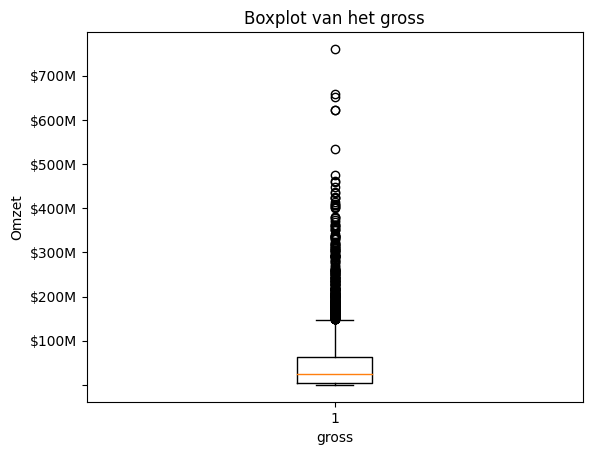

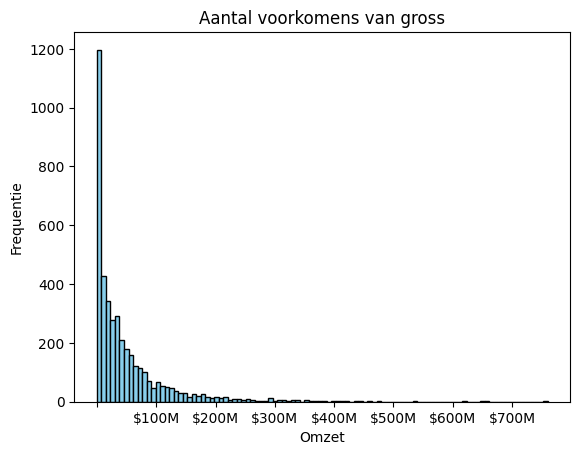

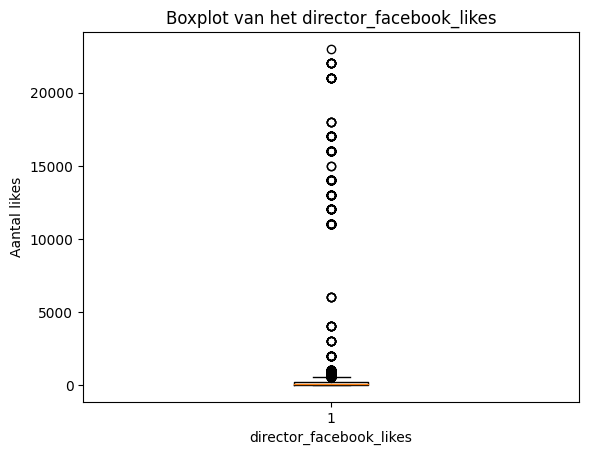

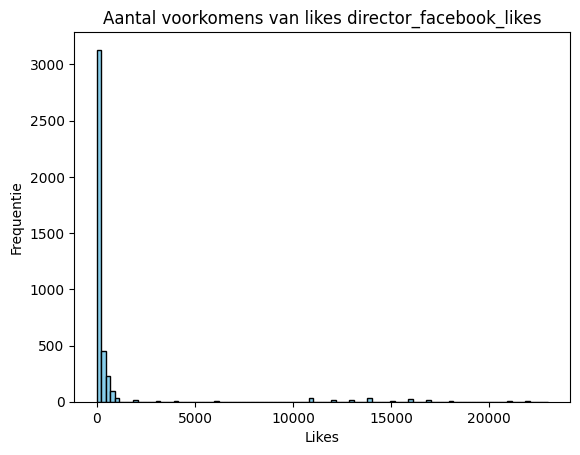

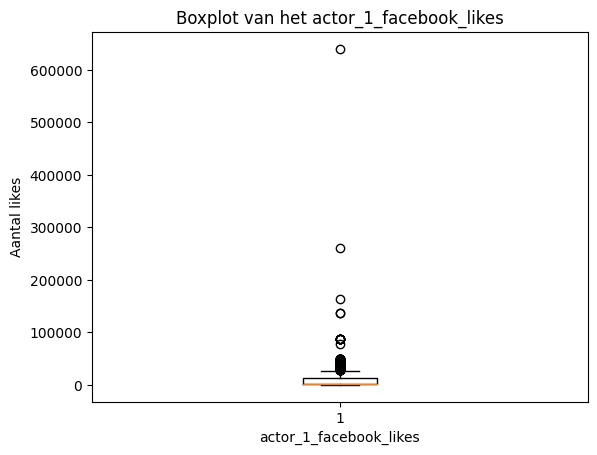

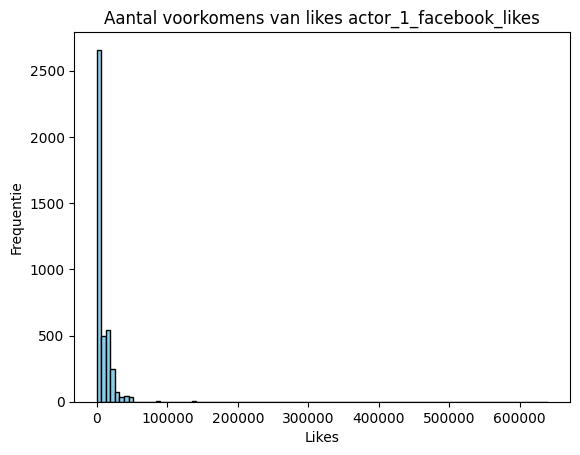

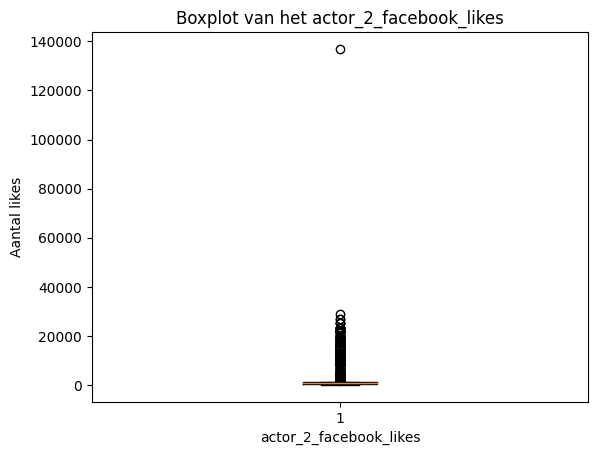

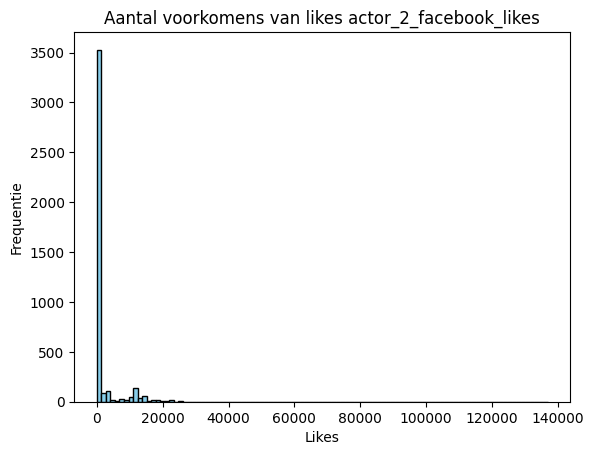

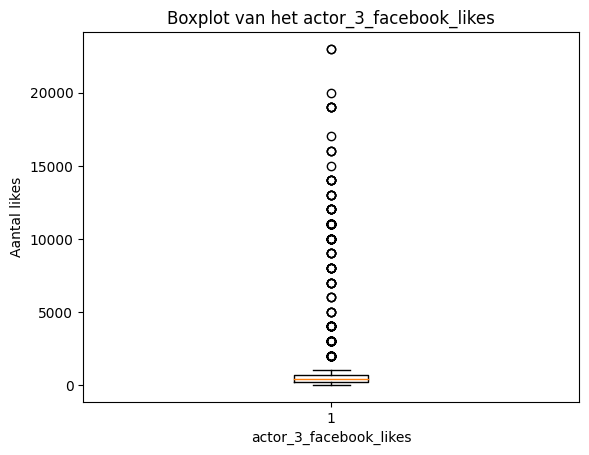

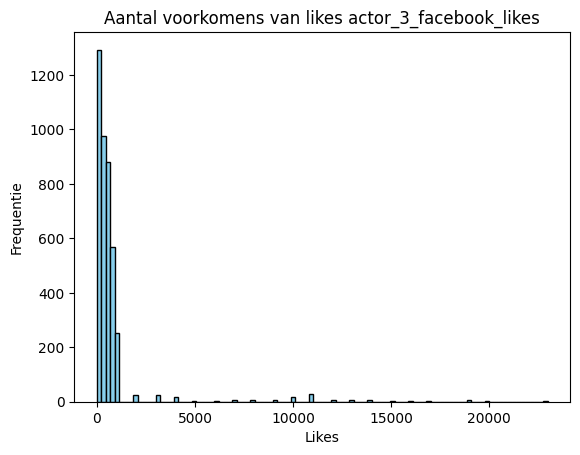

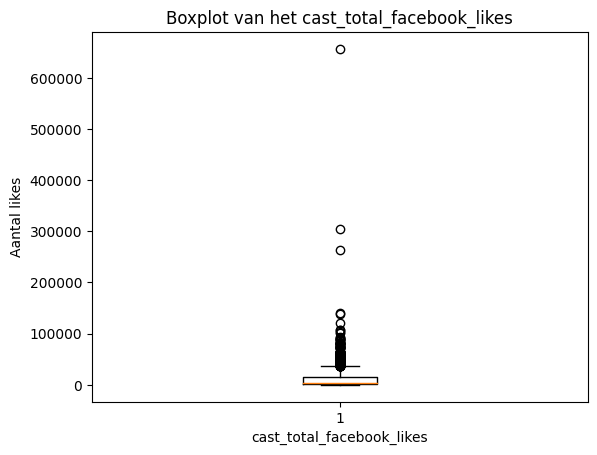

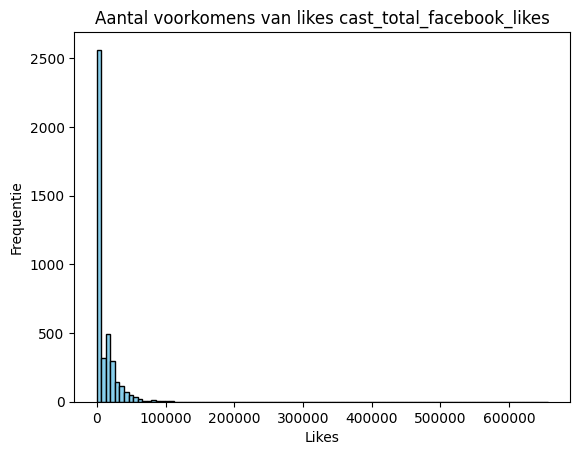

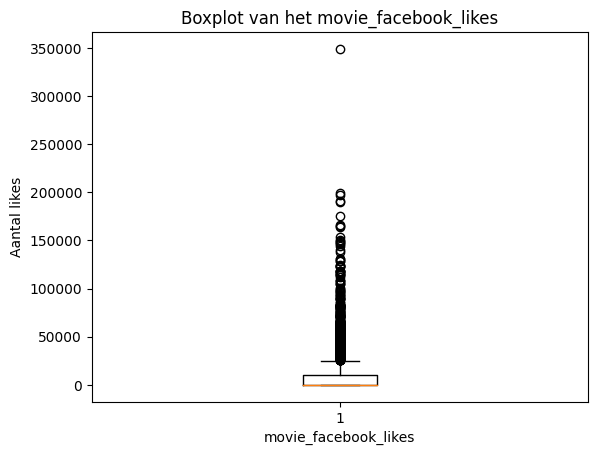

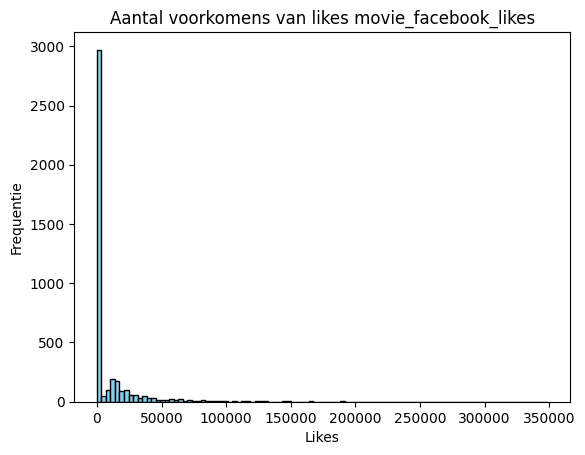

In [1364]:
# print(f"Count before removing outliers: {df.shape}")
boxplot_gross(df, 'gross')
histogram_gross(df, 'gross')
# df = remove_outliers(df, 'gross')
# print(f"Count after removing outliers: {df.shape}")
# boxplot_gross(df, 'gross')
# histogram_gross(df, 'gross')

for feature in featureVariables:
    if 'like' in feature:
        # print(f"Count before removing outliers: {df.shape}")
        boxplot_likes(df, feature)
        histogram_likes(df, feature)
        # df = remove_outliers(df, feature)
        # print(f"Count after removing outliers: {df.shape}")
        # boxplot_likes(df, feature)
        # histogram_likes(df, feature)

**Calculate the numeric variables against the target variable so we can look which features are (somewhat) important to the target variable**

In [1365]:
correlation = df[numVariable].corr()['gross'].sort_values(ascending=False)

print(correlation)

gross                        1.000000
movie_facebook_likes         0.377715
actor_3_facebook_likes       0.307898
actor_2_facebook_likes       0.262397
cast_total_facebook_likes    0.246547
imdb_score                   0.200515
actor_1_facebook_likes       0.153992
director_facebook_likes      0.144661
Name: gross, dtype: float64


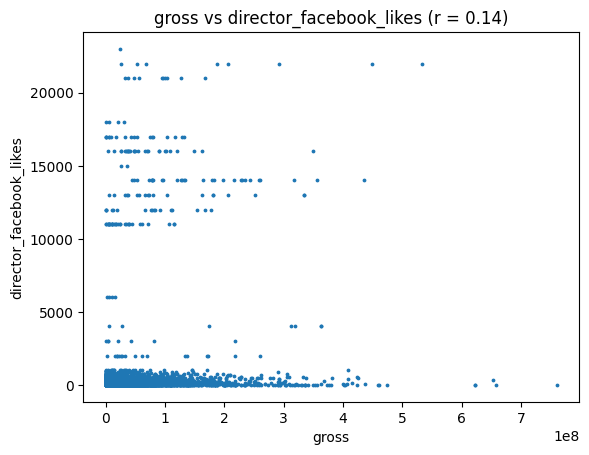

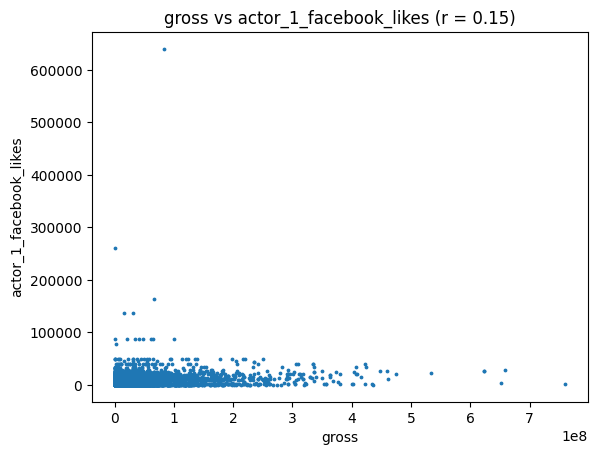

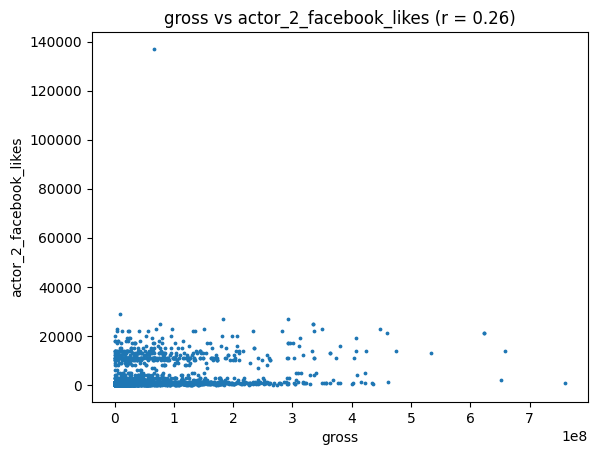

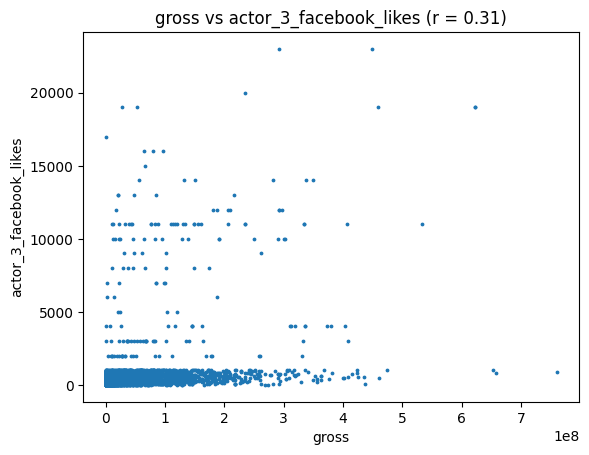

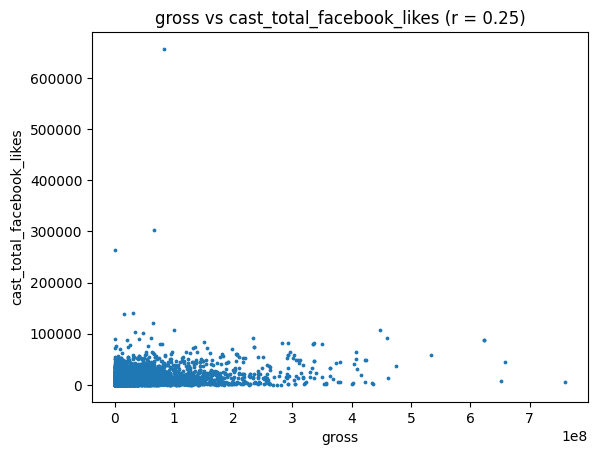

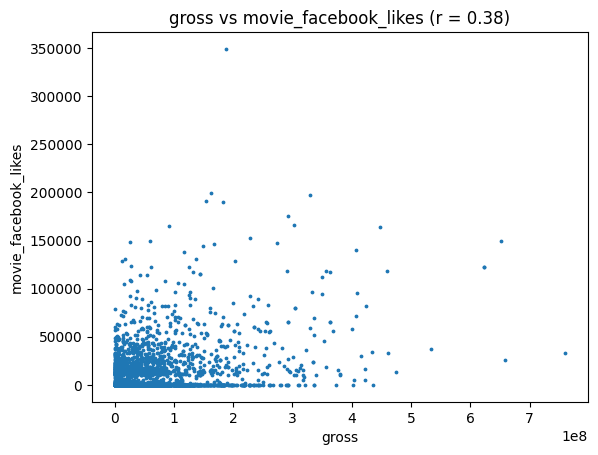

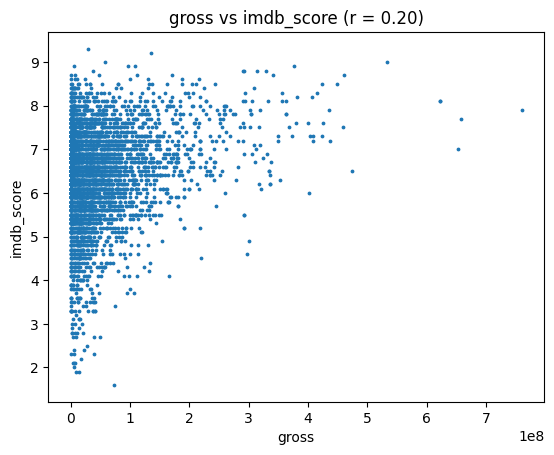

In [1366]:
correlation_plot(df, 'gross', 'director_facebook_likes')
correlation_plot(df, 'gross', 'actor_1_facebook_likes')
correlation_plot(df, 'gross', 'actor_2_facebook_likes')
correlation_plot(df, 'gross', 'actor_3_facebook_likes')
correlation_plot(df, 'gross', 'cast_total_facebook_likes')
correlation_plot(df, 'gross', 'movie_facebook_likes')
correlation_plot(df, 'gross', 'imdb_score')

**Assign dummy values to all the names. This is needed to calculate our model.**

In [1367]:
#We selecteren de kolommen die wel al uit integers bestaan
X_numeric = df[['director_facebook_likes', 
                'actor_1_facebook_likes', 
                'actor_2_facebook_likes', 
                'actor_3_facebook_likes', 
                'cast_total_facebook_likes', 'movie_facebook_likes', 'imdb_score'
                ]]
#Vervolgens zetten we de andere kolommen om naar integers
X_dummies = pd.get_dummies(df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']], dtype = int)
#We plakken de twee dataframes weer aan elkaar

X = pd.concat([X_numeric, X_dummies], axis = 1)
y = df[['gross']]


X.head(1)

director_facebook_likes  actor_1_facebook_likes  actor_2_facebook_likes  \
0                      0.0                  1000.0                   936.0   

   actor_3_facebook_likes  cast_total_facebook_likes  movie_facebook_likes  \
0                   855.0                       4834                 33000   

   imdb_score  director_name_Aaron Schneider  director_name_Aaron Seltzer  \
0         7.9                              0                            0   

   director_name_Abel Ferrara  director_name_Adam Brooks  \
0                           0                          0   

   director_name_Adam Carolla  director_name_Adam Goldberg  \
0                           0                            0   

   director_name_Adam Marcus  director_name_Adam McKay  \
0                          0                         0   

   director_name_Adam Rapp  director_name_Adam Rifkin  \
0                        0                          0   

   director_name_Adam Shankman  director_name_Adrian Lyne  \
0                            0                          0   

   director_name_Adrienne Shelly  director_name_Agnieszka Holland  \
0                              0                                0   

   director_name_Agnieszka Wojtowicz-Vosloo  director_name_Aki Kaurismäki  \
0                                         0                             0   

   director_name_Akira Kurosawa  director_name_Akiva Goldsman  \
0                             0                             0   

   director_name_Akiva Schaffer  director_name_Alain Resnais  \
0                             0                            0   

   director_name_Alan Cohn  director_name_Alan J. Pakula  \
0                        0                             0   

   director_name_Alan Metter  director_name_Alan Parker  \
0                          0                          0   

   director_name_Alan Poul  director_name_Alan Rudolph  \
0                        0                           0   

   director_name_Alan Shapiro  director_name_Alan Taylor  \
0                           0                          0   

   director_name_Albert Brooks  director_name_Albert Hughes  \
0                            0                            0   

   director_name_Alejandro Agresti  director_name_Alejandro Amenábar  \
0                                0                                 0   

   director_name_Alejandro G. Iñárritu  director_name_Alejandro Monteverde  \
0                                    0                                   0   

   director_name_Alessandro Carloni  director_name_Alex Craig Mann  \
0                                 0                              0   

   director_name_Alex Garland  director_name_Alex Gibney  \
0                           0                          0   

   director_name_Alex Kendrick  director_name_Alex Proyas  \
0                            0                          0   

   director_name_Alex Rivera  director_name_Alex Smith  \
0                          0                         0   

   director_name_Alex Zamm  director_name_Alexander Payne  \
0                        0                              0   

   director_name_Alexander Witt  director_name_Alexandre Aja  \
0                             0                            0   

   director_name_Alfonso Cuarón  director_name_Alfred Hitchcock  \
0                             0                               0   

   director_name_Alice Wu  director_name_Alison Maclean  \
0                       0                             0   

   director_name_Alister Grierson  director_name_Allen Coulter  \
0                               0                            0   

   director_name_Allen Hughes  director_name_Allison Anders  \
0                           0                             0   

   director_name_Amy Heckerling  director_name_Anand Tucker  \
0                             0                           0   

   director_name_Andrea Arnold  director_name_Andrea Di Stefano  \
0         

In [1368]:
print(X.shape) #check impact

(4143, 8788)


In [1369]:
#We gebruiken numpy om random integers te genereren op basis waarvan we de rijen voor de test set selecteren.
import numpy as np
test_index = np.random.randint(0,30,size = 6)
test_index

array([15, 28,  4, 24, 20, 10])

In [1370]:
#We gebruiken test_index om de train en de test set te genereren
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

X_train = X.drop(test_index)
y_train = y.drop(test_index)

KeyError: '[4] not found in axis'

In [1347]:
#bekijk de dataframes om te zien of het goed is gegaan (controleer zelf eventueel de anderen)
X_test

director_facebook_likes  actor_1_facebook_likes  actor_2_facebook_likes  \
4                     131.0                   131.0                    12.0   
23                      0.0                  5000.0                   972.0   
28                    532.0                 14000.0                 10000.0   
11                      0.0                 18000.0                 10000.0   
4                     131.0                   131.0                    12.0   
17                      0.0                 26000.0                 21000.0   

    actor_3_facebook_likes  cast_total_facebook_likes  movie_facebook_likes  \
4                      NaN                        143                     0   
23                   773.0                       9152                 83000   
28                   627.0                      26679                 44000   
11                   903.0                      29991                     0   
4                      NaN                        143                     0   
17                 19000.0                      87697                123000   

    imdb_score  director_name_A. Raven Cruz  director_name_Aaron Hann  \
4          7.1                            0                         0   
23         7.9                            0                         0   
28         5.9                            0                         0   
11         6.1                            0                         0   
4          7.1                            0                         0   
17         8.1                            0                         0   

    director_name_Aaron Schneider  director_name_Aaron Seltzer  \
4                               0                            0   
23                              0                            0   
28                              0                            0   
11                              0                            0   
4                               0                            0   
17                              0                            0   

    director_name_Abel Ferrara  director_name_Adam Brooks  \
4                            0                          0   
23                           0                          0   
28                           0                          0   
11                           0                          0   
4                            0                          0   
17                           0                          0   

    director_name_Adam Carolla  director_name_Adam Goldberg  \
4                            0                            0   
23                           0                            0   
28                           0                            0   
11                           0                            0   
4                            0                            0   
17                           0                            0   

    director_name_Adam Green  director_name_Adam Jay Epstein  \
4                          0                               0   
23                         0                               0   
28                         0                               0   
11                         0                               0   
4                          0                               0   
17                         0                               0   

    director_name_Adam Marcus  director_name_Adam McKay  \
4                           0                         0   
23                          0                         0   
28                          0                         0   
11                          0                         0   
4                           0                         0   
17                          0                         0   

    director_name_Adam Rapp  director_name_Adam Rifkin  \
4                         0                          0   
23                        0                          0   
28            